# Data Loading and Preprocessing

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reduce the size of the dataset
train_size = 10000
test_size = 2000
X_train = X_train[:train_size]
y_train = y_train[:train_size]
X_test = X_test[:test_size]
y_test = y_test[:test_size]

# Reshape input data to 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize images (scale pixel values between 0 and 1)
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Preprocess data with standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


# SVM Model

In [23]:
# Development and training of the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Evaluation of the SVM model
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Model Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


SVM Model Accuracy: 0.921
SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       175
           1       0.97      0.99      0.98       234
           2       0.84      0.95      0.89       219
           3       0.91      0.93      0.92       207
           4       0.95      0.91      0.93       217
           5       0.94      0.90      0.92       179
           6       0.93      0.92      0.92       178
           7       0.90      0.88      0.89       205
           8       0.94      0.87      0.91       192
           9       0.91      0.87      0.89       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

SVM Model Confusion Matrix:
[[171   0   0   0   0   1   3   0   0   0]
 [  0 232   0   0   0   0   2   0   0   0]
 [  3   0 208   1   0   0   1   3   3   0]
 [  0   0   3 192   0   3

#Tensorflow Model

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Development and training of the neural network model with TensorFlow
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # specifying the shape of the input data
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in the case of MNIST, so Dense(10, ...)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, callbacks=[early_stopping])


Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.4844 - accuracy: 0.8580 - val_loss: 0.2941 - val_accuracy: 0.9080
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1517 - accuracy: 0.9554 - val_loss: 0.2661 - val_accuracy: 0.9185
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0800 - accuracy: 0.9770 - val_loss: 0.2605 - val_accuracy: 0.9270
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0491 - accuracy: 0.9861 - val_loss: 0.2464 - val_accuracy: 0.9330
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0273 - accuracy: 0.9936 - val_loss: 0.2680 - val_accuracy: 0.9295
Epoch 6/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0144 - accuracy: 0.9977 - val_loss: 0.2702 - val_accuracy: 0.9320
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.2767 - val_accuracy: 0.9325


In [29]:
# Evaluation of the neural network model
nn_probabilities = model.predict(X_test_scaled)
nn_predictions = np.argmax(nn_probabilities, axis=1)  # Converting probabilities to classes
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Model Accuracy:", nn_accuracy)
print("Neural Network Model Classification Report:")
print(classification_report(y_test, nn_predictions))
print("Neural Network Model Confusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))


63/63 [==============================] - 0s 2ms/step
Neural Network Model Accuracy: 0.9205
Neural Network Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       175
           1       0.97      0.99      0.98       234
           2       0.93      0.91      0.92       219
           3       0.89      0.92      0.90       207
           4       0.94      0.91      0.93       217
           5       0.92      0.89      0.91       179
           6       0.90      0.93      0.91       178
           7       0.90      0.87      0.89       205
           8       0.91      0.90      0.91       192
           9       0.88      0.92      0.90       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Neural Network Model Confusion Matrix:
[[168   0   1   0   0   1   3   0   2   0]
 [  0 231   0   0   1   

Model Comparison:
SVM Model Accuracy: 0.921
Neural Network Model Accuracy: 0.9205


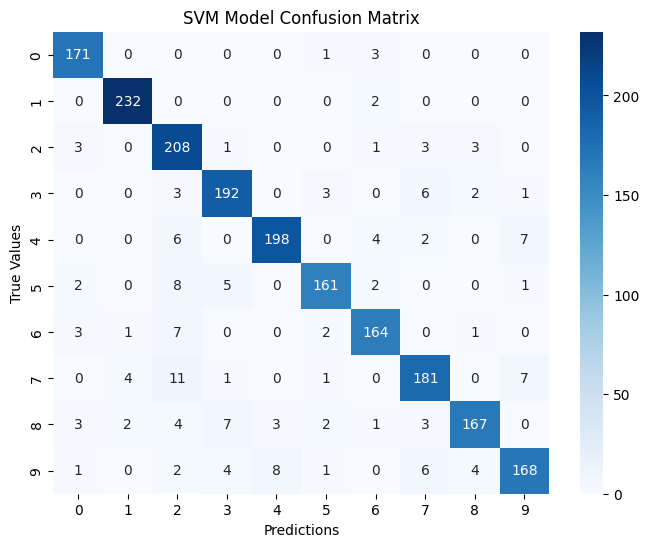

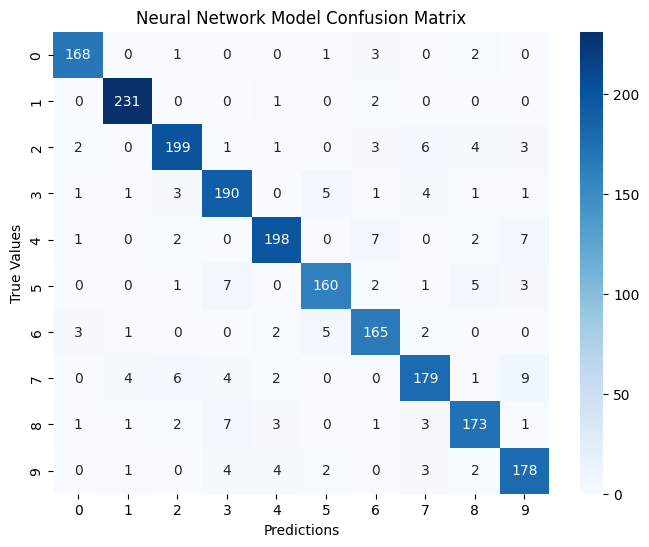

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model comparison
print("Model Comparison:")
print("SVM Model Accuracy:", svm_accuracy)
print("Neural Network Model Accuracy:", nn_accuracy)

# Visualization of results
# Confusion matrix of the SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, cmap='Blues', fmt='g')
plt.title("SVM Model Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

# Confusion matrix of the neural network model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, cmap='Blues', fmt='g')
plt.title("Neural Network Model Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()



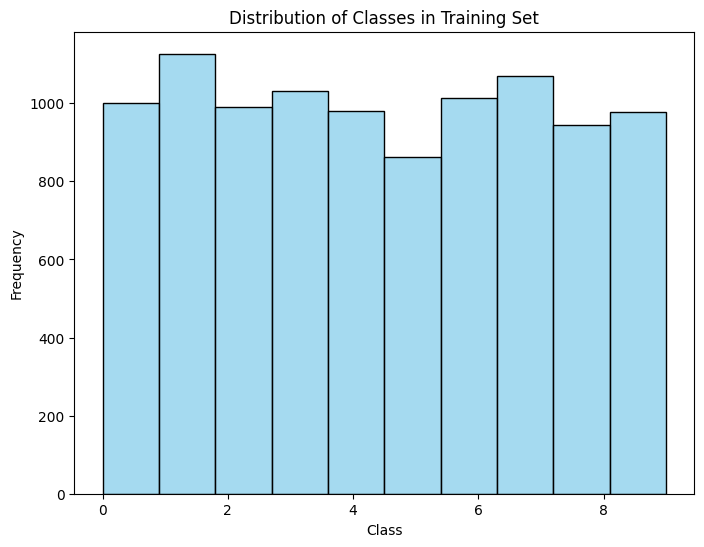

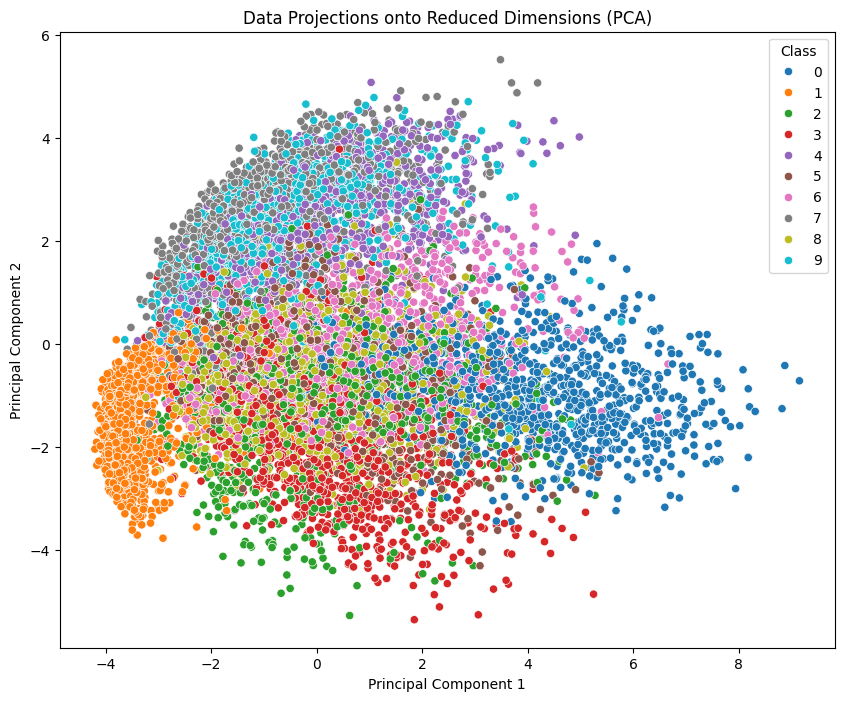

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of labels to show the distribution of classes
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=10, kde=False, color='skyblue')
plt.title("Distribution of Classes in Training Set")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()



# Scatter plot to visualize data projections onto reduced dimensions
from sklearn.decomposition import PCA

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

# Visualize PCA projections with class labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='tab10', legend='full')
plt.title("Data Projections onto Reduced Dimensions (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.show()


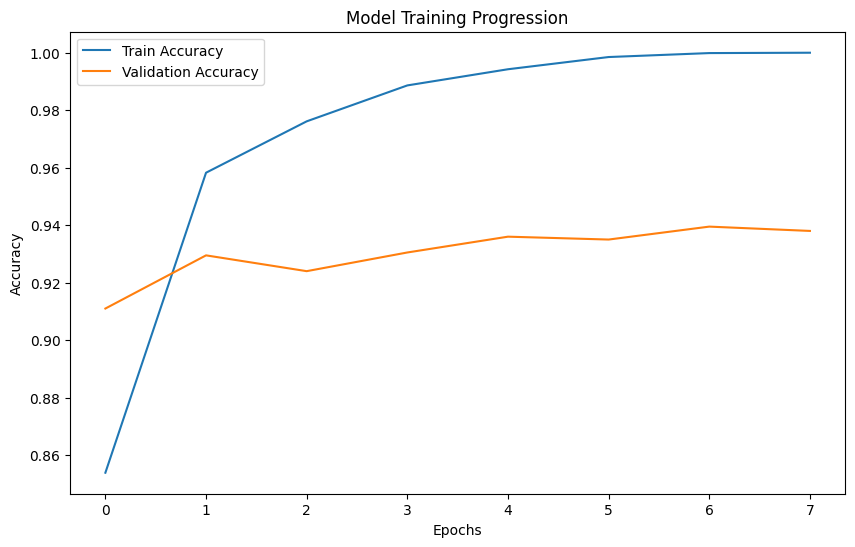

In [35]:
import matplotlib.pyplot as plt

# Convergence plot to track the training progress of the model
plt.figure(figsize=(10, 6))

plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Training Progression")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


